<a href="https://colab.research.google.com/github/HWMV/Mnist_fashion_classifier_model/blob/main/Mnist_fashion_classifier_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mnist_fashion_classifier_model

### 10개의 클래스로 나누어진 의류 이미지를 분류하는 모델

추후 github에 데이터 로드/저장 하는 방법 다시 해보자! (토큰 환경변수에 저장해서 불러오기는 해봄)

일단 원본 데이터를 tensorflow 에서 직접 다운로드 받아보자~

## 1. 데이터 로드 및 확인

In [19]:
# import tensorflow
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [20]:
# data load & separation

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [21]:
# # data My_local_save (save in github)
# import pickle

# # origin data save
# origin_data_file_path = 'fashion_mnist_full_data.pickle'

# with open(origin_data_file_path, 'wb') as file:
#     origin_data = {
#         'x_train': x_train,
#         'y_train': y_train,
#         'x_test': x_test,
#         'y_test': y_test,
#     }
#     pickle.dump(origin_data, file)

In [22]:
# !pip install PyGithub

In [23]:
# from github import Github
# import base64
# import os

# # GitHub Personal Access Token을 환경 변수에서 가져옵니다 (터미널 작업)
# token = os.environ.get("GITHUB_ACCESS_TOKEN")

# # GitHub 리포지토리 이름 및 파일 경로 설정
# repository_name = "HWMV/Mnist_fashion_classifier_model"

# data_file_paths = [
#     'x_train.pickle',
#     'y_train.pickle',
#     'x_test.pickle',
#     'y_test.pickle',
# ]

# # GitHub 레포지토리에 파일 업로드
# g = Github(token)
# repo = g.get_repo(repository_name)

# for file_path in data_file_paths:
#     contents = open(file_path, "rb").read()
#     encoded_contents = base64.b64encode(contents)
#     encoded_contents = encoded_contents.decode("utf-8")
#     repo.create_file(file_path, f"Add {file_path}", encoded_contents, branch="main")

In [24]:
# class classifier

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [25]:
# y_train index 0 check
# 0번째 인덱스는 6번 클래스에 shirt
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [26]:
# x_train 0 index check
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

<ipython-input-27-7bbfbb582ccc>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


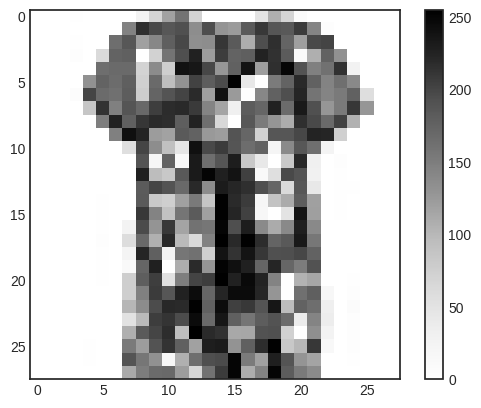

In [27]:
# Check with image
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

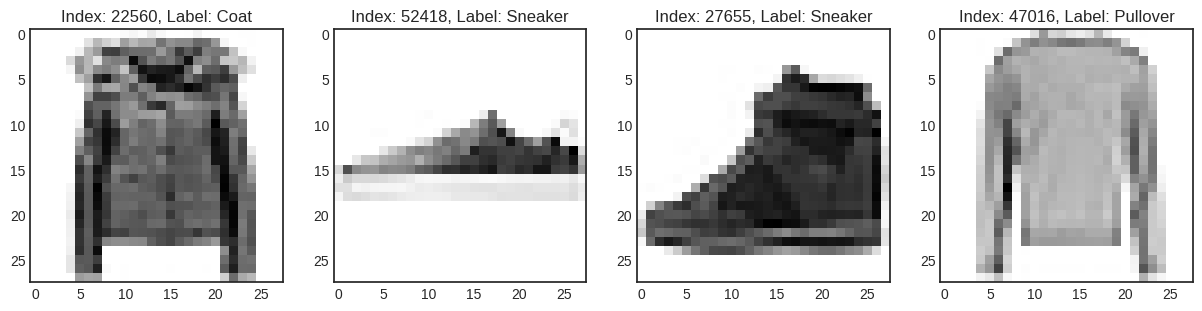

In [28]:
# Print 4 images randomly
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

##2. 데이터 전처리

In [31]:
# Check data separation
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [32]:
# size reshape 28 x 28 = 784
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [33]:
# data Normalization
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

##3. 모델 구성 (레이어 설정)

In [34]:
# model creation
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407050 (1.55 MB)
Trainable params: 407050 (1.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 4. 모델 컴파일 및 학습

In [35]:
# model compile & fit
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

In [36]:
# data separation for Validation
# history variable declaration
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 3s 26ms/step - loss: 2.1894 - accuracy: 0.3294 - val_loss: 2.0392 - val_accuracy: 0.4346
Epoch 2/60
83/83 [==============================] - 2s 22ms/step - loss: 1.9137 - accuracy: 0.5800 - val_loss: 1.8055 - val_accuracy: 0.5973
Epoch 3/60
83/83 [==============================] - 3s 36ms/step - loss: 1.7065 - accuracy: 0.6347 - val_loss: 1.6192 - val_accuracy: 0.6277
Epoch 4/60
83/83 [==============================] - 4s 43ms/step - loss: 1.5449 - accuracy: 0.6648 - val_loss: 1.4784 - val_accuracy: 0.6830
Epoch 5/60
83/83 [==============================] - 2s 22ms/step - loss: 1.4174 - accuracy: 0.6830 - val_loss: 1.3648 - val_accuracy: 0.6845
Epoch 6/60
83/83 [==============================] - 2s 26ms/step - loss: 1.3160 - accuracy: 0.6954 - val_loss: 1.2741 - val_accuracy: 0.6828
Epoch 7/60
83/83 [==============================] - 2s 22ms/step - loss: 1.2342 - accuracy: 0.7030 - val_loss: 1.1982 - val_accuracy: 0.7009
Epoch 8/60
83

In [37]:
# history function declaration
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

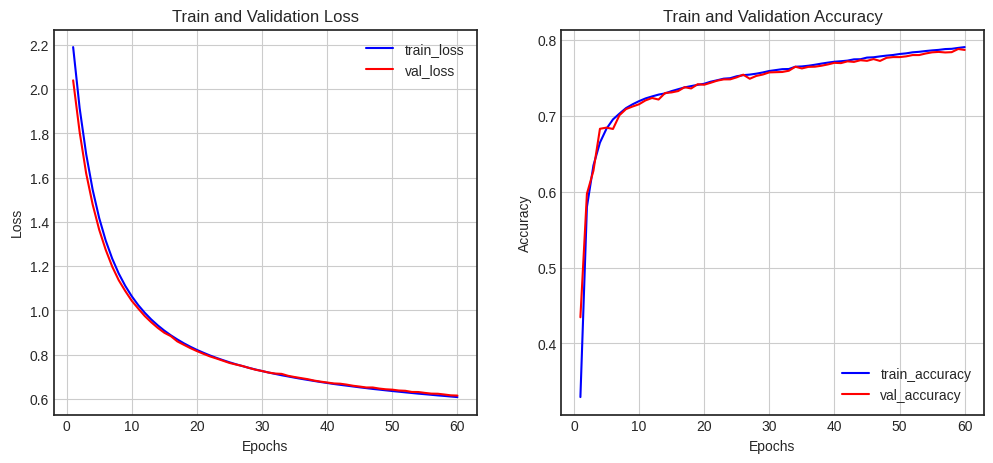

In [38]:
# history visualization

show_history(history)

## 5. 모델 평가 및 예측

In [39]:
# model evaluate (test data)
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6290 - accuracy: 0.7787


[0.628951370716095, 0.7786999940872192]

In [40]:
# Check predict value, 5 index
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

313/313 [==============================] - 1s 3ms/step
[1.6926903e-02 9.4052577e-01 3.8559420e-03 1.2778274e-02 1.8605705e-02
 4.1092640e-05 7.1547874e-03 3.9257753e-05 5.5771034e-05 1.6560325e-05]
1
Trouser


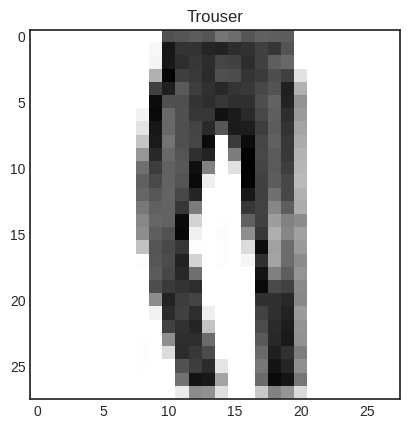

In [41]:
# pred values vs True values
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

In [42]:
# 이미지와 레이블 함께 출력하는 함수 정의
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

In [44]:
# 전체 클래스 중 각 클래스의 예측 확률 시각화 함수
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

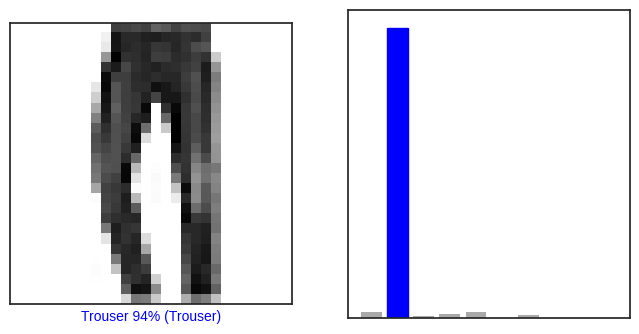

In [45]:
# 위 함수 2가지 사용(index 5)
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

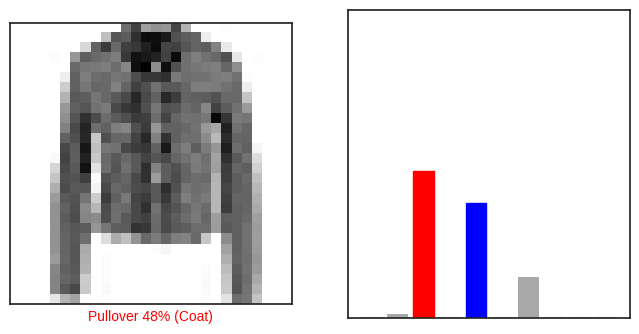

In [46]:
# 위 함수 2가지 사용(index 10)
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

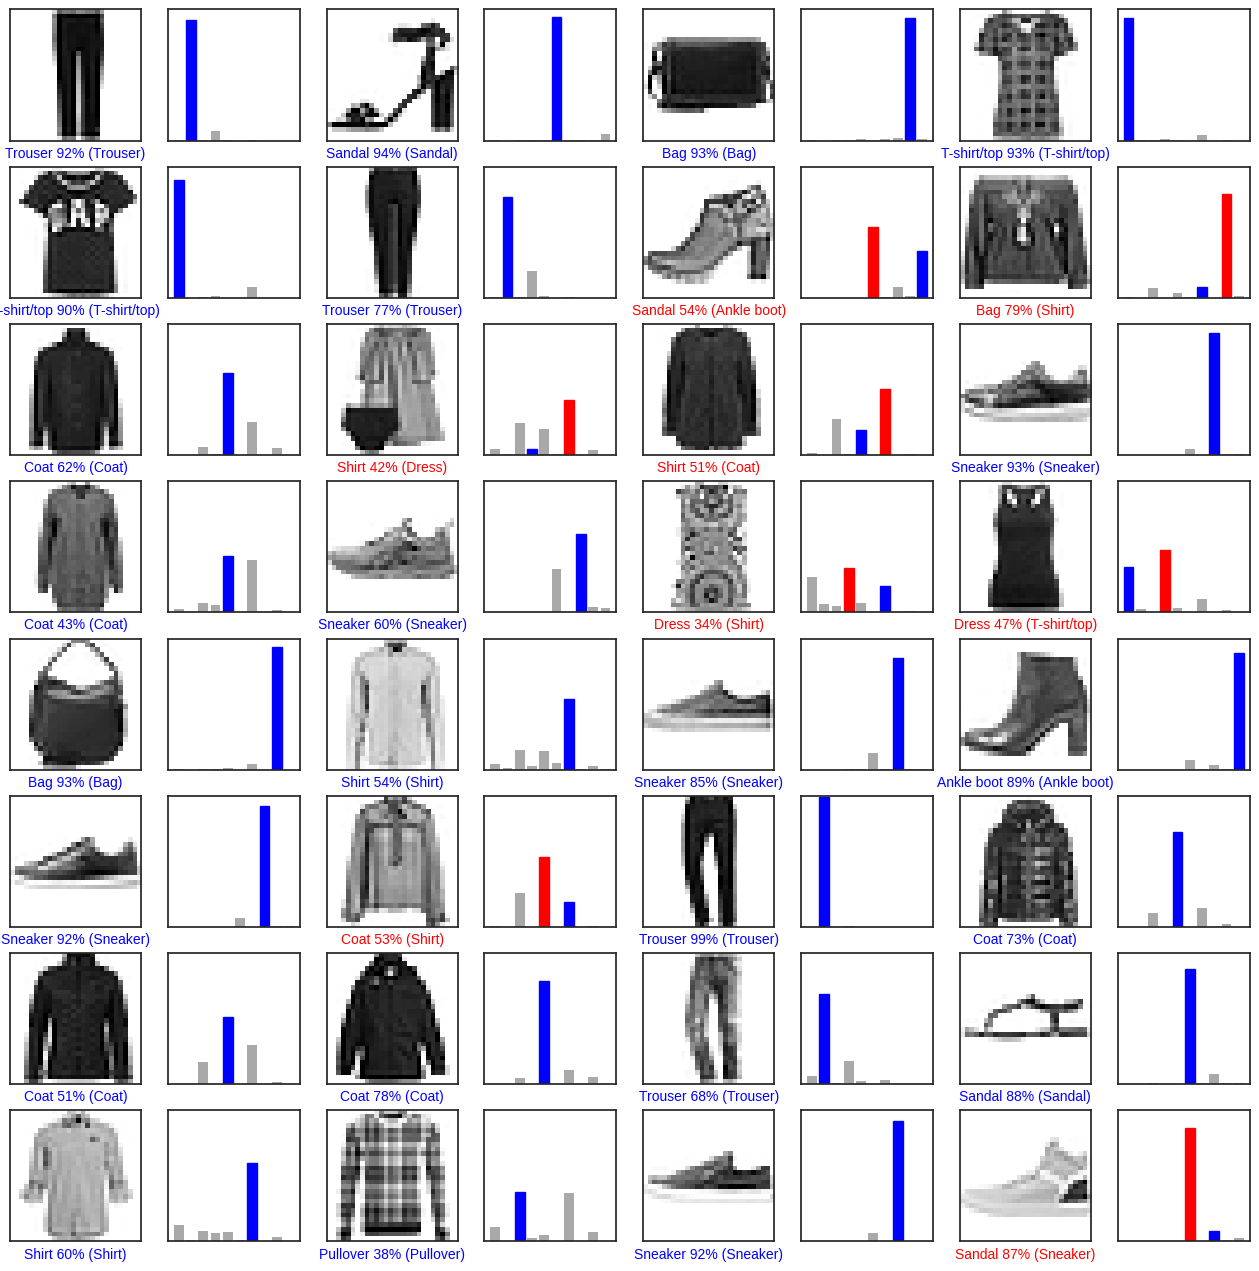

In [47]:
# 예측 결과 다수 확인
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

In [48]:
# classification_report 활용해서
# precision, recall, f1-score, support를 살펴볼 수 있습니다.

from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1),
                            np.argmax(pred_ys, axis=-1),
                            target_names=class_names))




              precision    recall  f1-score   support

 T-shirt/top       0.75      0.78      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.71      0.58      0.64      1000
       Dress       0.79      0.82      0.80      1000
        Coat       0.67      0.69      0.68      1000
      Sandal       0.85      0.83      0.84      1000
       Shirt       0.46      0.49      0.47      1000
     Sneaker       0.83      0.86      0.84      1000
         Bag       0.92      0.91      0.91      1000
  Ankle boot       0.88      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



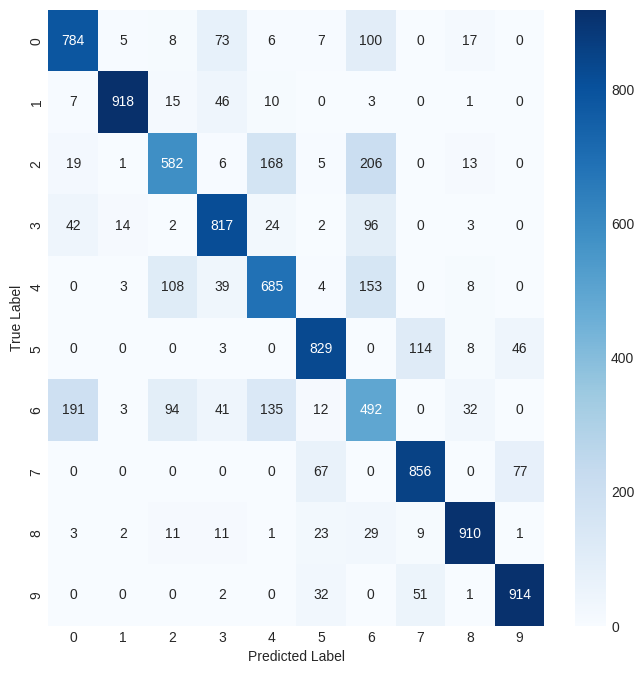

In [49]:
# 혼동 행렬로 예측값과 실제값 일치 여부 시각화 (confusion_matrix)
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()